## Capacitance-Voltage Charcateristic
The capacitance of a pn junction $(C_j)$ depends on the width $(W)$ of the depletion layer.
$$
C_j = \frac{\epsilon_0 \epsilon_r A}{W} 
$$
where  
$\epsilon_r$ - Dielectic constant (relative)  
$A$ - Surface area (n.b. This is not flat area, surface roughness must be taken into account)

If the junction is heavily p-doped then it will be an asymmetric $p^+ n$ junction where $N_a$ >> $N_d$. In this case the total depletion width is approximately equal to the depletion width on just the n-side of the junction.

$$
W = \sqrt{\frac{2\epsilon_0 \epsilon_r (V_{bi}-V)}{eN_d}}
$$

To experimentally characterize a pn-junction, often the capacitance is measured as a function of the applied voltage. For an abrupt $p^+ n$ junction, a plot of $1/C_j^2$ versus $V$ is a straight line. The formula can be determined from the above two equations. The slope and intercept of this line give the doping concentration and built-in potential.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import matplotlib.ticker as ticker


# Set the path to the foldercontaining text files
folder_path = "C:\\Users\\w16025698\\OneDrive - Northumbria University - Production Azure AD\\PhD\\Characterisation\\CV\\230221J_A3_CV\\"

file_name = "37A_A1 PP.txt"

# Read the data from the text file, skipping the first 12 lines
data_df = pd.read_csv(
    os.path.join(folder_path, file_name),
    skiprows=1,
    delimiter='\t',
    header=None,
    encoding='ISO-8859-1', # Try 'latin1' or 'ISO-8859-1' if utf-8 doesn't work
    names=["Voltage (V)", "Inverse Capacitance Squared (1/F^2)", "-"]  
)

data_df = data_df[["Voltage (V)", "Inverse Capacitance Squared (1/F^2)"]]
data_df["Inverse Capacitance Squared (1/F^2)"] = np.abs(data_df["Inverse Capacitance Squared (1/F^2)"])
data_df["Capacitance (F)"] = 1/ np.sqrt(data_df["Inverse Capacitance Squared (1/F^2)"]) # Capacitance in Farads
data_df["Inverse Capacitance Squared (nF)"] = 1/((1E9 * data_df["Capacitance (F)"])**2) # inverse capacitance squared in nano Farads

display(data_df)

,Voltage (V),Inverse Capacitance Squared (1/F^2),Capacitance (F),Inverse Capacitance Squared (nF)
0,-1.00,3.330000e+16,5.479966e-09,3.330000e-02
1,-0.99,3.300000e+16,5.504819e-09,3.300000e-02
2,-0.98,3.300000e+16,5.504819e-09,3.300000e-02
3,-0.97,3.280000e+16,5.521576e-09,3.280000e-02
4,-0.96,3.260000e+16,5.538488e-09,3.260000e-02
...,...,...,...,...
196,0.96,4.170000e+11,1.548574e-06,4.170000e-07
197,0.97,4.300000e+11,1.524986e-06,4.300000e-07
198,0.98,4.430000e+11,1.502443e-06,4.430000e-07
199,0.99,4.570000e+11,1.479251e-06,4.570000e-07


## Equations

$$
\frac{1}{C_{j}^{2}} = \frac{2}{A^2} \frac{V_0 - V_a}{q \epsilon N_d}
$$
***

$$
N_d(x) = \frac{2}{q \epsilon A^{2} \lvert \frac{d}{dV_a} \left( \frac{1}{C^{2}_{j}} \right) \rvert}
$$
***
$$
x= \frac{\epsilon A}{C_j}
$$
***

## Dopant Density and Depletion Width


In [2]:
q = 1.602176565E-10 # elementary charge nF.V
eps = 8.854187817E-05 # permitivity of vacuum nF/cm
eps_CZTS = 7.6 # Static dielectric constant for CZTS
A = 0.000016 # cell area in m2

x_constants = eps*eps_CZTS*A*0.1 # constants in um 
data_df["X (um)"] = x_constants/data_df["Capacitance (F)"] # depth in um

C_grad = np.gradient(data_df["Inverse Capacitance Squared (nF)"], data_df["Voltage (V)"]) # gradient of inverse capacitance with respect to Vdelta

dopant_denisty_constants = 2/(q*eps*eps_CZTS*(A*1E4)**2)
data_df["Dopant Density (cm-3)"] = dopant_denisty_constants/abs(C_grad)

# Find index of voltage closest to 0
voltage_zero_idx = np.argmin(np.abs(data_df["Voltage (V)"]))

# Calculate dopant density and x_um at voltage=0
inverse_cap_squared_zero = data_df.at[voltage_zero_idx, "Inverse Capacitance Squared (nF)"]
capacitance_zero = data_df.at[voltage_zero_idx, "Capacitance (F)"]
C_grad_zero = C_grad[voltage_zero_idx]

x_um_zero = x_constants/capacitance_zero
dopant_density_zero = 2/(q*eps*eps_CZTS*(A*1E4)**2*abs(C_grad_zero))

print("Dopant density at 0 voltage = {:.2e} cm^-3".format(dopant_density_zero))
print("Depth (x_um) at 0 voltage = {:.2f} um".format(x_um_zero))

Dopant density at 0 voltage = 9.73e+15 cm^-3
Depth (x_um) at 0 voltage = 0.10 um


## Built-in Voltage

Built-in Voltage (V): 0.1509


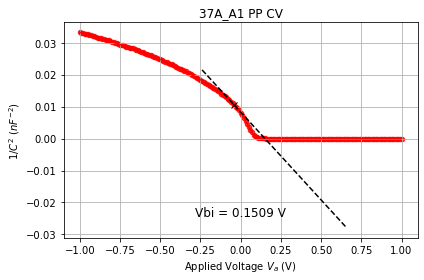

In [13]:
### Plot inverse capactiance squared in nF vs applied voltage
fig2, ax = plt.subplots()

ax.set_xlabel("Applied Voltage $V_a$ (V)")
ax.set_ylabel("$1/C^2$ ($nF^{-2}$)")
ax.plot(data_df["Voltage (V)"], data_df["Inverse Capacitance Squared (nF)"], color='r')
ax.scatter(data_df["Voltage (V)"], data_df["Inverse Capacitance Squared (nF)"], c='r', alpha=0.8, marker='o', s=20)
ax.grid()

### Calculate V0 ###
v1 = -0.1 # lower bound
v2 = 0.0 # upper bound
C_grad2 = np.gradient(C_grad, data_df["Voltage (V)"]) # second order derivative of inverse cap sqaured
v_range_indices = np.where((data_df["Voltage (V)"] >= v1) & (data_df["Voltage (V)"] <= v2))
inflection_index = v_range_indices[0][np.argmax(C_grad2[v_range_indices])]
slope_at_inflection = C_grad[inflection_index]
y_intercept = data_df.at[inflection_index, "Inverse Capacitance Squared (nF)"] - slope_at_inflection * data_df.at[inflection_index, "Voltage (V)"]
plt.plot(data_df.at[inflection_index,"Voltage (V)"], data_df.at[inflection_index,"Inverse Capacitance Squared (nF)"],  'kx')

# Plot the tangent line
x1 = data_df.at[inflection_index,"Voltage (V)"] - 0.2
x2 = data_df.at[inflection_index,"Voltage (V)"] + 0.7
x_vals = np.linspace(x1, x2, num=100)
y_vals = C_grad[inflection_index] * x_vals + y_intercept
ax.plot(x_vals, y_vals, 'k--')

V0 = - y_intercept / slope_at_inflection
print("Built-in Voltage (V): {:.4f}".format(V0))
data_df["V delta (V)"] = V0 - data_df["Voltage (V)"] # V0 - applied voltage

# Add V0 as text onto the figure
ax.text(0.5, 0.1, "Vbi = {:.4f} V".format(V0), 
        transform=ax.transAxes, fontsize=12, ha='center')

#CV_title = ''
CV_title = file_name.replace('.txt', ' CV')
plt.title(CV_title)
plt.tight_layout()

# Figure save settings
save_dir = os.path.join(folder_path, 'CV plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, CV_title + '.png'), dpi=300)

# Capacitance-Voltage Plots

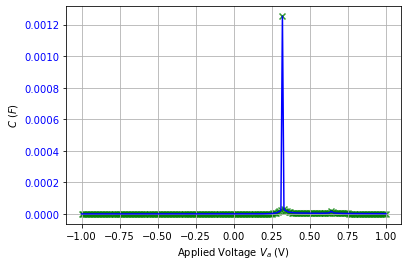

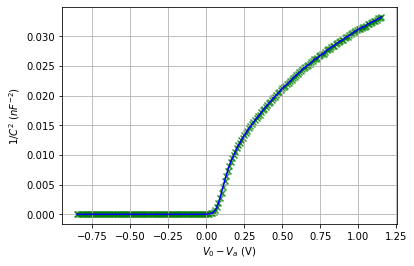

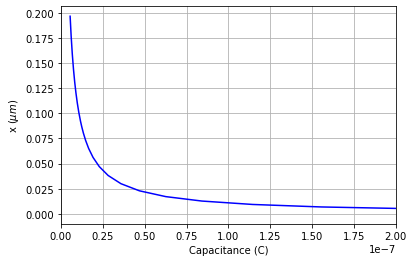

In [14]:
### Plot the Capacitance vs applied Voltage
fig1, ax = plt.subplots()

ax.set_xlabel("Applied Voltage $V_a$ (V)")
ax.set_ylabel("$C$ ($F$)")
ax.plot(data_df["Voltage (V)"], data_df["Capacitance (F)"], color='blue')
ax.scatter(data_df["Voltage (V)"], data_df["Capacitance (F)"], c='green', alpha=0.8, marker='x')
ax.tick_params(axis='y', labelcolor='blue')
#ax.set_ylim(-5, 30)
#ax.set_xlim(-50, 600)
ax.grid()

### Plot inverse capactiance squared in nF vs delta voltage
fig3, ax = plt.subplots()

ax.set_xlabel("$V_0 - V_a$ (V)")
ax.set_ylabel("$1/C^2$ ($nF^{-2}$)")
ax.plot(data_df["V delta (V)"], data_df["Inverse Capacitance Squared (nF)"], color='blue')
ax.scatter(data_df["V delta (V)"], data_df["Inverse Capacitance Squared (nF)"], c='green', alpha=0.8, marker='x')
ax.grid()

### Plot of x vs Capacitance ###
fig4 , ax = plt.subplots()
ax.plot(data_df["Capacitance (F)"] ,data_df["X (um)"], color='b')
ax.set_xlabel("Capacitance (C)")
ax.set_ylabel("x ($\mu m$)")
ax.set_xlim(0,2E-7)
ax.grid()

## Plotting

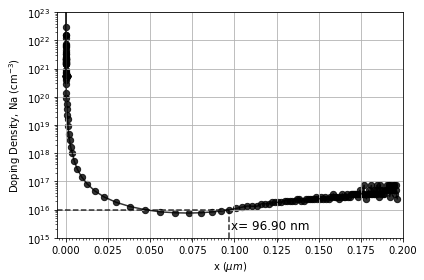

In [15]:
fig, ax1 = plt.subplots()

# Set y axis limits
xlim_min = -0.005
xlim_max = 0.2
ylim_min = 1E15
ylim_max = 1E23

ax1.set_xlabel('x ($\mu m$)')
ax1.set_ylabel('Doping Density, Na (cm$^{-3}$)')
ax1.scatter(data_df["X (um)"], data_df["Dopant Density (cm-3)"], c='k', alpha=0.8, marker='o', label='Doping Density', s=40)
ax1.plot(data_df["X (um)"], data_df["Dopant Density (cm-3)"], c='k', alpha=0.8)

# plot a vertical dashed line at x_um_zero
ax1.vlines(x_um_zero, ylim_min, dopant_density_zero, colors='k', linestyles='--', alpha=0.8)
ax1.hlines(dopant_density_zero, xlim_min, x_um_zero, colors='k', linestyles='--', alpha=0.8)

# Add text with values
ax1.text(x_um_zero + 0.001, ylim_min * 2, "x= {:.2f} nm".format(x_um_zero*1000), fontsize=12)

ax1.set_yscale('log')
ax1.set_ylim(ylim_min, ylim_max)
ax1.set_xlim(xlim_min, xlim_max)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.002))
ax1.grid()

# combine the legends from both scatter plots
handles1, labels1 = ax1.get_legend_handles_labels()
handles = handles1 
labels = labels1 

dep_title = file_name.replace('.txt', ' Dopant Density')
plt.tight_layout()

# Figure save settings
save_dir = os.path.join(folder_path, 'CV plots')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, dep_title + '.png'), dpi=400)

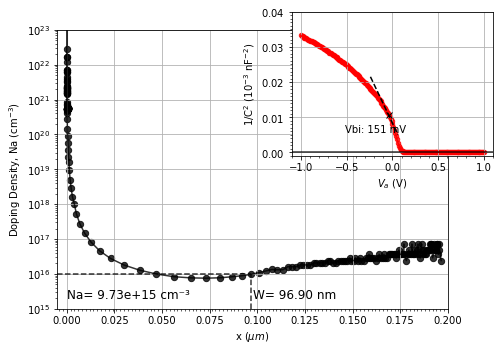

In [16]:
fig, ax1 = plt.subplots(figsize=(7,5))

# Set y axis limits
xlim_min = -0.005
xlim_max = 0.2
ylim_min = 1E15
ylim_max = 1E23

ax1.set_xlabel('x ($\mu m$)')
ax1.set_ylabel('Doping Density, Na (cm$^{-3}$)')
ax1.scatter(data_df["X (um)"], data_df["Dopant Density (cm-3)"], c='k', alpha=0.8, marker='o', label='Doping Density', s=40)
ax1.plot(data_df["X (um)"], data_df["Dopant Density (cm-3)"], c='k', alpha=0.8)

# plot a vertical dashed line at x_um_zero
ax1.vlines(x_um_zero, ylim_min, dopant_density_zero, colors='k', linestyles='--', alpha=0.8)
ax1.hlines(dopant_density_zero, xlim_min, x_um_zero, colors='k', linestyles='--', alpha=0.8)

# Add text with values
ax1.text(x_um_zero + 0.001, ylim_min * 2, "W= {:.2f} nm".format(x_um_zero*1000), fontsize=12)
ax1.text(0, ylim_min * 2, "Na= {:.2e} cm⁻³".format(dopant_density_zero), fontsize=12)

ax1.set_yscale('log')
ax1.set_ylim(ylim_min, ylim_max)
ax1.set_xlim(xlim_min, xlim_max)
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.002))
ax1.grid()

# combine the legends from both scatter plots
handles1, labels1 = ax1.get_legend_handles_labels()
#handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 
labels = labels1 


# Create a second axes for the additional plot in the top right corner
ax2 = fig.add_axes([0.59, 0.55, 0.4, 0.4])  # Adjust the position and size as needed

# Plot inverse capacitance squared in nF vs. applied voltage on ax2
ax2.set_xlabel("$V_a$ (V)", fontsize=10)
ax2.set_ylabel("1/C$^2$ (10$^{-3}$ nF$^{-2}$)", fontsize=10)
ax2.plot(data_df["Voltage (V)"], data_df["Inverse Capacitance Squared (nF)"], color='r')
ax2.scatter(data_df["Voltage (V)"], data_df["Inverse Capacitance Squared (nF)"], c='r', alpha=0.8, marker='o', s=20)
ax2.axhline(0, c='k',  alpha=0.8)
ax2.set_ylim(-1E-3,4E-2)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.001))
ax2.grid()

# Set y-axis tick formatter for the top axis
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, 3))
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.offsetText.set_visible(False)

# Calculate V0
v1 = -0.1  # lower bound
v2 = 0.0 # upper bound
C_grad2 = np.gradient(C_grad, data_df["Voltage (V)"])
v_range_indices = np.where((data_df["Voltage (V)"] >= v1) & (data_df["Voltage (V)"] <= v2))
inflection_index = v_range_indices[0][np.argmax(C_grad2[v_range_indices])]
slope_at_inflection = C_grad[inflection_index]
y_intercept = data_df.at[inflection_index, "Inverse Capacitance Squared (nF)"] - slope_at_inflection * data_df.at[inflection_index, "Voltage (V)"]

ax2.plot(data_df.at[inflection_index, "Voltage (V)"], data_df.at[inflection_index,"Inverse Capacitance Squared (nF)"], 'kx')

# Plot the tangent line
x1 = data_df.at[inflection_index, "Voltage (V)"] - 0.2
x2 = data_df.at[inflection_index, "Voltage (V)"] + 0.1
x_vals = np.linspace(x1, x2, num=100)
y_vals = slope_at_inflection * x_vals + y_intercept
ax2.plot(x_vals, y_vals, 'k--')

V0 = -y_intercept / slope_at_inflection
ax2.text(0.57, 0.15, "Vbi: {:.0f} mV".format(V0*1000),
         transform=ax2.transAxes, fontsize=10, ha='right', va='bottom')

plt.subplots_adjust(top=0.9, right=0.9)  # Adjust the top and right margins as needed

# Save the figure
plt.savefig(os.path.join(save_dir, CV_title + '_with_inverted_C.png'), dpi=300)